<a href="https://colab.research.google.com/github/okzeesh/CS-351-AI-Lab-Github-repository-2022644/blob/main/Neural_Networks_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Neural Networks: Basics of Building, Training, and Evaluating**

## **Overview**
This repository implements and evaluates neural networks for classification tasks on two datasets: the **Iris** and **Wine** datasets. The project explores the effects of modifying a neural network's architecture and applies the model to a new dataset to understand the impact on performance metrics.

---

## **Structure**
### **1. Modified Neural Network - Iris Dataset**
- **Goal**: Enhance the existing feedforward neural network by adding a hidden layer with 16 neurons.
- **Dataset**: [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- **Model Details**:
  - Input Layer: 4 neurons
  - Hidden Layers:
    - Layer 1: 10 neurons, ReLU activation
    - Layer 2: 16 neurons, ReLU activation (added layer)
  - Output Layer: 3 neurons, Softmax activation
- **Metrics**:
  - Training/Validation Loss and Accuracy
  - Test Accuracy
- **Visualization**:
  - Epoch-wise plots of training and validation metrics.

---

### **2. New Neural Network - Wine Dataset**
- **Goal**: Build and evaluate a new neural network for classification using the Wine dataset.
- **Dataset**: [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
- **Preprocessing**:
  - Features standardized using `StandardScaler`.
  - Labels one-hot encoded.
- **Model Details**:
  - Input Layer: 13 neurons
  - Hidden Layers:
    - Layer 1: 8 neurons, ReLU activation
    - Layer 2: 16 neurons, ReLU activation
  - Output Layer: 3 neurons, Softmax activation
- **Metrics**:
  - Training/Validation Loss and Accuracy
  - Confusion Matrix for test predictions
- **Visualization**:
  - Epoch-wise plots of training and validation metrics.
  - Confusion matrix for test predictions.

---

## **How to Run**
1. **Install dependencies**:
   ```bash
   pip install tensorflow matplotlib scikit-learn
   ```

2. **Execute the code**:
   - Open the provided notebook or Python script in your IDE.
   - Run the script to train and evaluate the models.

3. **View Results**:
   - Training/Validation metrics will be displayed as plots.
   - Confusion matrix will be generated for the Wine dataset.

---

## **Results**
### **Iris Dataset**
The Results can be seen in the Graphs below

### **Wine Dataset**
The Results can be seen in the Graphs below
- Confusion Matrix: Generated for test predictions.

---

## **Discussion and Analysis**
### **Effects of Adding Layers**
- Adding a hidden layer improved the Iris dataset's classification performance by increasing model capacity.
- Overfitting was mitigated through proper train-validation-test splits.

### **Performance on Iris vs. Wine**
- The Wine dataset posed a more challenging task due to its higher feature count and class complexity, leading to slightly lower accuracy compared to the Iris dataset.

---

## **Deliverables**
1. **Code**: Complete implementation of neural networks for both datasets.
2. **Visualizations**: Training/Validation metrics and confusion matrix.
3. **Analysis**: Discusses the effects of architectural modifications and dataset differences.

---


# **Part 1: Modified Neural Network on Iris Dataset**
---

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


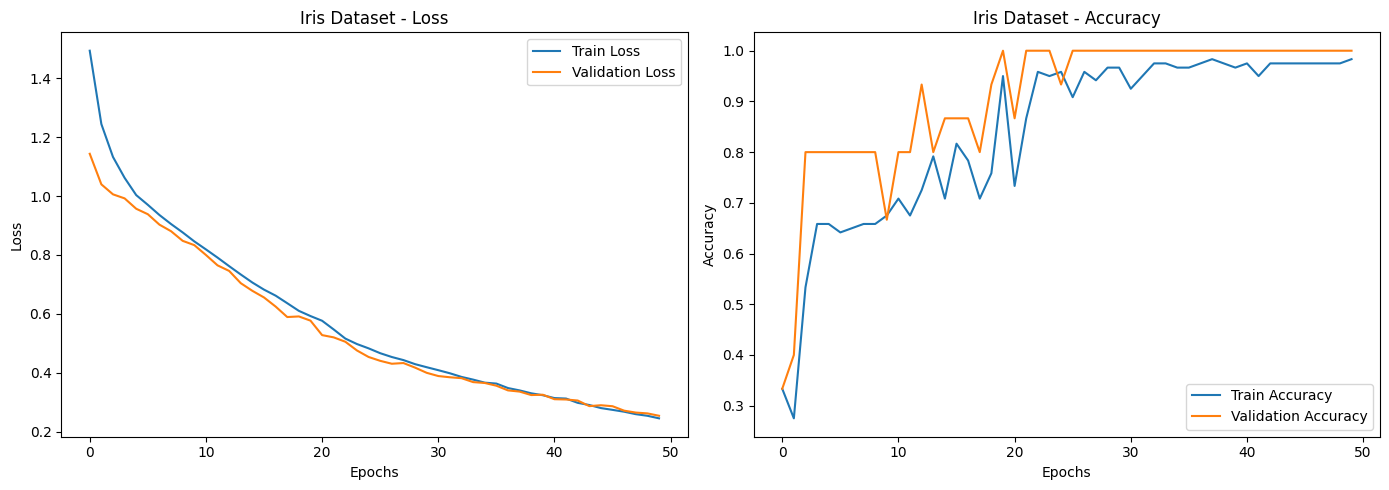

In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Helper function to plot metrics
def plot_metrics(history, title="Model Metrics"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    # Plot loss
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title(f'{title} - Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title(f'{title} - Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

# Load and preprocess Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = to_categorical(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Build the modified neural network
model_iris = Sequential([
    Dense(10, input_shape=(X_iris.shape[1],), activation='relu'),
    Dense(16, activation='relu'),  # Additional hidden layer
    Dense(3, activation='softmax')
])

model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_iris = model_iris.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, verbose=0)

# Evaluate the model
test_loss_iris, test_accuracy_iris = model_iris.evaluate(X_test, y_test, verbose=0)

# Plot metrics
plot_metrics(history_iris, title="Iris Dataset")


---
# **Part 2: Neural Network on Wine Dataset**
---

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


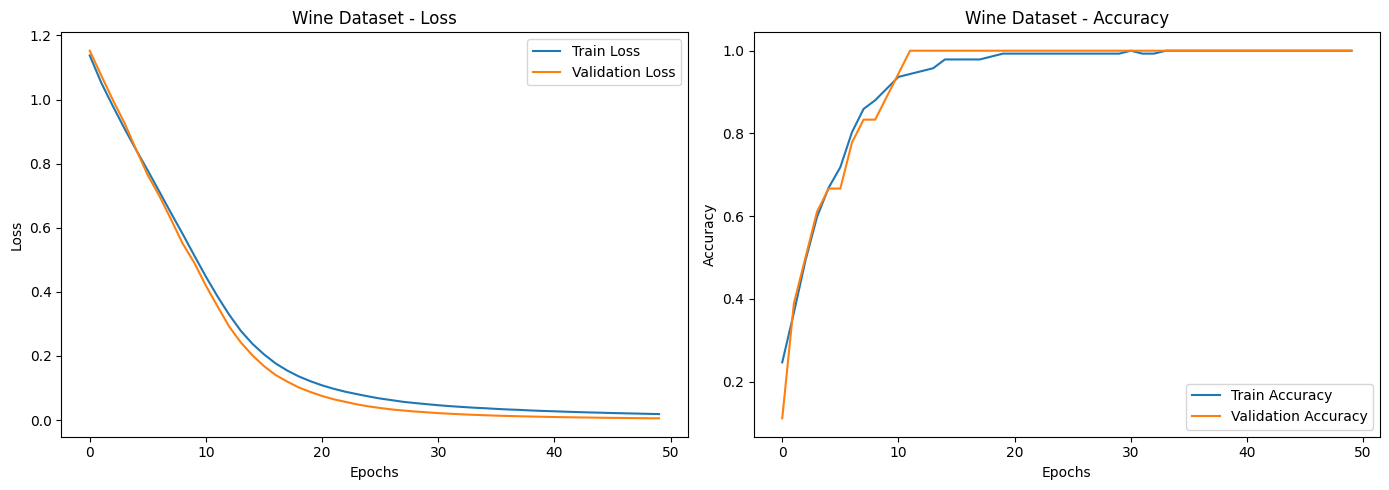

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


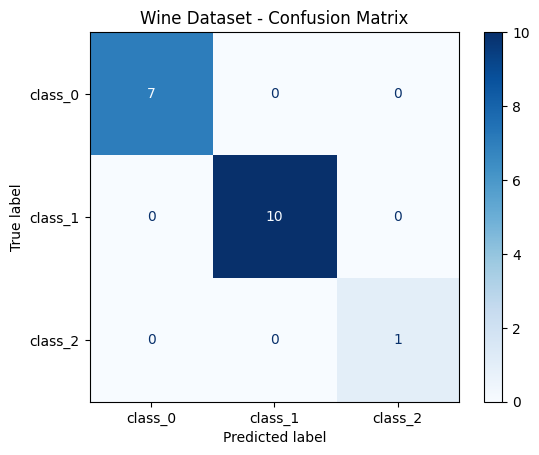

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = to_categorical(wine.target)

scaler = StandardScaler()
X_wine = scaler.fit_transform(X_wine)

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Build the neural network for Wine dataset
model_wine = Sequential([
    Dense(8, input_shape=(X_wine.shape[1],), activation='relu'),
    Dense(16, activation='relu'),  # Second hidden layer
    Dense(3, activation='softmax')
])

model_wine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_wine = model_wine.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, verbose=0)

# Evaluate the model
test_loss_wine, test_accuracy_wine = model_wine.evaluate(X_test, y_test, verbose=0)

# Plot metrics
plot_metrics(history_wine, title="Wine Dataset")

# Confusion matrix for test predictions
y_pred_wine = model_wine.predict(X_test).argmax(axis=1)
y_true_wine = y_test.argmax(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true_wine, y_pred_wine), display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Wine Dataset - Confusion Matrix")
plt.show()
